Dataset link
https://drive.google.com/file/d/1GS-8_EpmTliRE02OX8As7kfMm2hxdLbI/view?usp=sharing

# Logistic Regression

For a more detailed lesson on Logistic Regression see (watch the entire series) https://www.youtube.com/watch?v=zAULhNrnuL4

Used to predict categories (as opposed to a numerical values in Linear Regression) and solve classification machine learning problems. 

Will customer buy a product?
Will the team win the game?





 ## What are the chances of a customer buying a product based on their gender?

# **Bank Marketing Data Set**

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


Attribute Information:

Input variables:

**Bank client data:**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**Related with the last contact of the current campaign:**

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


**Social and economic context attributes**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Exploring and creating a logistic model using banking data:

In [1]:
# Create a DataFrame variable containing the banking data CSV file.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option('display.max_columns', None)
bankData = pd.read_csv('banking.csv')

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Explore the dataset and determine what the dependent variable (target array) is. 
print(bankData.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93

In [3]:
print(bankData.shape)

(41188, 21)


In [4]:
print(bankData.columns.values)

['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed'
 'y']


In [5]:
print(bankData.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


#### Data set has no missing values

### Visualizing categorical variables

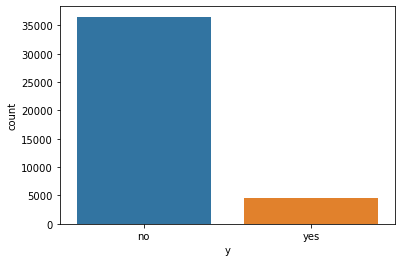

In [6]:
# Labels against frequency 
plt.figure()
sb.countplot(x='y', data=bankData)

plt.show()

Dataset is imbalanced 

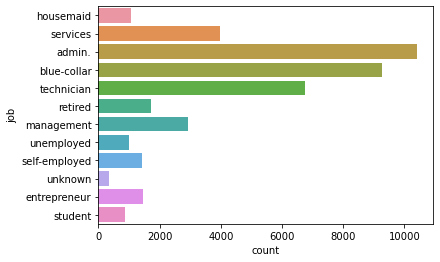

In [7]:
# Distribution of Jobs
plt.figure()
sb.countplot(y='job', data=bankData)

plt.show()

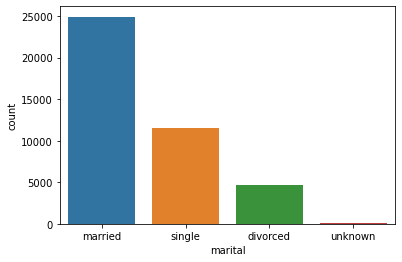

In [8]:
# Distribution on marital status
plt.figure()
sb.countplot(x='marital', data=bankData)

plt.show()

In [9]:
# Create dummy variables for all the categorical variables that you have kept.
df2 = pd.get_dummies(bankData, columns=['job', 'marital', 'default', 'housing', 'loan', 'poutcome', 'education','contact'])

In [10]:
# Determine what features to include in the model. Remove the features you won’t include from the dataFrame.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   month                          41188 non-null  object 
 2   day_of_week                    41188 non-null  object 
 3   duration                       41188 non-null  int64  
 4   campaign                       41188 non-null  int64  
 5   pdays                          41188 non-null  int64  
 6   previous                       41188 non-null  int64  
 7   emp.var.rate                   41188 non-null  float64
 8   cons.price.idx                 41188 non-null  float64
 9   cons.conf.idx                  41188 non-null  float64
 10  euribor3m                      41188 non-null  float64
 11  nr.employed                    41188 non-null  float64
 12  y                              41188 non-null 

In [11]:
# Drop one variable from each of the sets of dummy vraibles. No information will be lost.  
df2.drop( ['job_unknown', 'marital_unknown' , 'default_unknown', 'housing_unknown', 'loan_unknown' , 'poutcome_nonexistent'
          ,'education_unknown','contact_telephone'], axis=1, inplace = True )

#Drop variables that do might not have an impact on the output  
df2.drop( ['month', 'day_of_week'], axis=1, inplace = True )

In [12]:
# check data types of all the variables. 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  object 
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

In [13]:
# converting y from 'yes' and 'no' to 1 and 0
df2['y'] = df2.y.map(dict(yes=1, no=0))

In [14]:
df2.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'poutcome_failure',
       'poutcome_success', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'contact_cellular'],
      dtype='object')

#### Note all the variables are neumerical execpt for y

In [15]:
# Split the data into a training and test set. 

# All columns are features execpt for y
X = df2.loc[:, ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'poutcome_failure',
       'poutcome_success', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'contact_cellular']]

# y is the target variable
y = df2.loc[:, ['y']]

In [16]:
#import a prebuilt function to split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28831, 40)
(28831, 1)
(12357, 40)
(12357, 1)


In [17]:
# Fit your training data to a Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# diclare the logistic model
model = LogisticRegression()

# train the model on the data
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
model.coef_

array([[ 3.35515141e-03,  4.48680176e-03, -7.03800223e-02,
        -1.67994521e-03,  1.76939787e-02, -2.60815845e-01,
         1.91349707e-01,  4.32782622e-02, -2.76307343e-01,
        -3.42418544e-03,  1.02004294e-02, -2.24386322e-02,
        -8.67943767e-04, -3.38895329e-04,  2.25090868e-03,
         8.62608462e-03, -3.42146278e-04, -5.60066499e-03,
         8.42554678e-03,  1.61846102e-03,  1.46579609e-03,
        -2.64469054e-03, -1.44495478e-02,  1.96736883e-02,
         2.77534521e-02, -3.21987566e-06, -2.01327651e-03,
         5.08390785e-03,  4.76873209e-03, -1.69810075e-03,
         7.31836382e-03,  3.19632646e-03, -4.59700925e-03,
        -3.91747145e-03, -9.81953746e-03, -2.24116644e-03,
         1.34254948e-04,  1.38948715e-03,  1.94312136e-02,
         4.03648602e-02]])

In [19]:
model.coef_.shape

(1, 40)

0.9112244072185806
[[10701   268]
 [  829   559]]


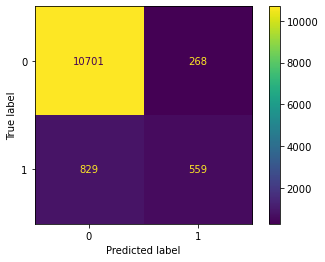

In [20]:
# Use the testing data to make predictions and determine the accuracy of your predictions.
y_pred = model.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [21]:
# Calculating a base line for comparing the model. 
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

[[10969     0]
 [ 1388     0]]


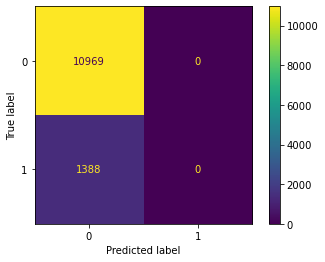

In [22]:
y_pred = dummy_clf.predict(X_test)

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(dummy_clf, X_test, y_test)
plt.show()

#### Plot ROC Score

In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.9234221251769789

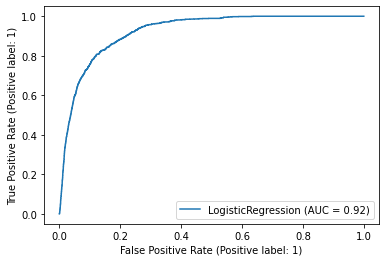

In [24]:
import matplotlib.pyplot as plt
metrics.plot_roc_curve(model, X_test, y_test) 
plt.show()